In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dataset_train = pd.read_csv('../../data/modified/blogData_newTrain.csv')
dataset_test = pd.read_csv('../../data/modified/blogData_newTest.csv')

LAST_COL = dataset_train.shape[1]

## Attribute Information:

|        Line       |                                                                                                                                  Description                                                                                                                                  |
|:-----------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|  **1**...**50**   | Average, standard deviation, min, max and median of the  Attributes 51...60 for the source of the current blog post  With source we mean the blog on which the post appeared.  For example, myblog.blog.org would be the source of  the post myblog.blog.org/post_2010_09_10  |
|       **51**      |                                                                                                                   Total number of comments *before* basetime                                                                                                                  |
|       **52**      |                                                                                                         Number of comments in the last 24 hours *before* the basetime                                                                                                         |
|       **53**      |                                         Let T1 denote the datetime 48 hours *before* basetime,  Let T2 denote the datetime 24 hours *before* basetime.  This attribute is the number of comments in the time period  between T1 and T2                                        |
|       **54**      |                                                                                    Number of comments in the first 24 hours after the  publication of the blog post, but *before* basetime                                                                                    |
|       **55**      |                                                                                                                    The diference of attribute *52* and *53*                                                                                                                   |
|  **56**...**60**  |                                              The same features as the attributes *51*...*55*, but  features *56*...*60* refer to the number of links (trackbacks),  while features *51*...*55* refer to the number of comments.                                               |
|       **61**      |                                                                                                   The length of time between the publication of the blog post  and basetime                                                                                                   |
|       **62**      |                                                                                                                          The length of the blog post                                                                                                                          |
|  **63**...**262** |                                                                                              The 200 bag of *words* features for 200 frequent words of the  text of the blog post                                                                                             |
| **263**...**269** |                                                                                              binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime                                                                                             |
| **270**...**276** |                                                                              binary indicator features (0 or 1) for the weekday  (Monday...Sunday) of the date of publication of the blog  post                                                                               |
|      **277**      |                                                                          Number of parent pages: we consider a blog post P as a  parent of blog post B, if B is a reply (trackback) to  blog post P.                                                                          |
| **278**...**280** |                                                                                                     Minimum, maximum, average number of comments that the parents received                                                                                                    |
|      **281**      |                                                                                                The target: the number of comments in the next 24 hours  (relative to basetime)                                                                                                |
                                                                                                               |

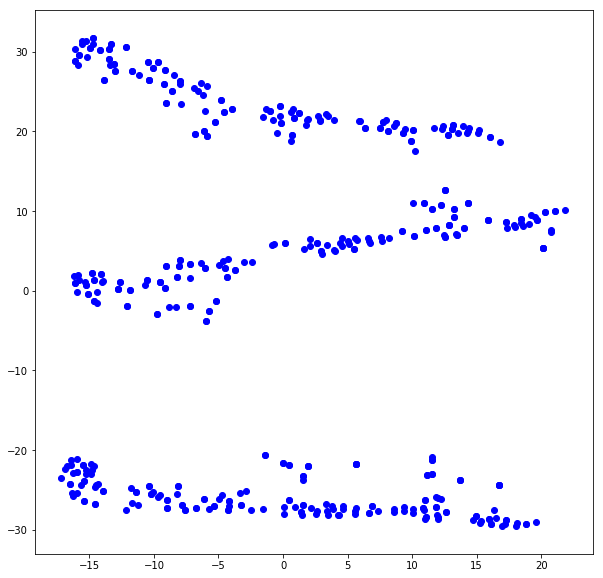

In [3]:
dados = dataset_train.iloc[:500, :LAST_COL]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (10, 10)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()


In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Data columns (total 68 columns):
X1      52397 non-null float64
X2      52397 non-null float64
X3      52397 non-null float64
X4      52397 non-null float64
X5      52397 non-null float64
X6      52397 non-null float64
X7      52397 non-null float64
X8      52397 non-null float64
X9      52397 non-null float64
X10     52397 non-null float64
X11     52397 non-null float64
X12     52397 non-null float64
X14     52397 non-null float64
X15     52397 non-null float64
X16     52397 non-null float64
X17     52397 non-null float64
X18     52397 non-null float64
X19     52397 non-null float64
X20     52397 non-null float64
X21     52397 non-null float64
X22     52397 non-null float64
X23     52397 non-null float64
X24     52397 non-null float64
X25     52397 non-null float64
X26     52397 non-null float64
X27     52397 non-null float64
X29     52397 non-null float64
X30     52397 non-null float64
X32     52397 non-null 

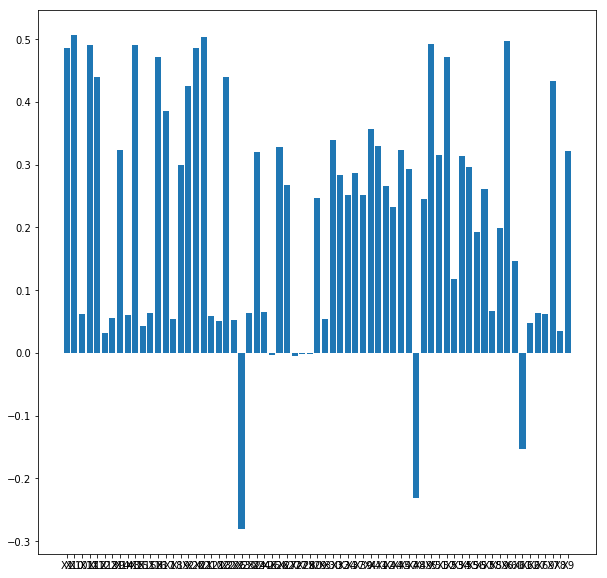

In [5]:
y_aux = dataset_train.corr()["Y"] # individual correlation, variables with target
x_aux = dataset_train.columns
plt.bar(x_aux[0:len(y_aux)-1], y_aux[0:len(y_aux)-1])
plt.show()

In [6]:
x_train = dataset_train.iloc[:,0:-1]
y_train = dataset_train.iloc[:,-1]

x_test = dataset_test.iloc[:, 0:-1]
y_test = dataset_test.iloc[:,-1]

In [7]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

init = time.time()
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(gbr.score(x_test, y_test)))
print(cross_val_score(gbr,x_test, y_test,scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 49.11903095245361 seconds
R2 score: 0.43672688837635776
[ 0.37466463  0.13976746  0.4357027 ]
MAE: 5.267729263683793


In [8]:
from sklearn.model_selection import cross_validate
cv = cross_validate(gbr, x_test, y_test, cv=5)
print(cv)

{'fit_time': array([ 5.96743941,  6.06777525,  5.66349769,  5.60551953,  5.70193195]), 'score_time': array([ 0.00919437,  0.01014113,  0.00869465,  0.00911498,  0.00886154]), 'test_score': array([ 0.26572329,  0.47070087,  0.24782019,  0.41104918,  0.48473572]), 'train_score': array([ 0.95346687,  0.95243531,  0.95807093,  0.942323  ,  0.95803858])}
